# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


In [37]:
# Открыв файл и выведя первые 5 строк, мы видим что данные разделены '\t'. Применим параметр 'sep'.
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# После того как привели датасет в более читабельный вид, выведем общую информацию.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
# Проверим на наличие дубликатов.
df.duplicated().sum()

In [ ]:
# Проверим на наличие пропусков.
df.isnull().sum()

In [ ]:
# Исследуем столбцы с пропусками подробнее. 

# Столбец 'is_apartment' должен иметь булев тип.
df['is_apartment'].unique()

In [ ]:
# В столбце есть значения nan. В здании не могут отсутствовать этажи.
df['floors_total'].unique()

In [ ]:
# Отсутствие балкона выражено через nan и 0.
df['balcony'].unique()

In [ ]:
# Некоторые имена населенных пунктов введены с ё или е. 
df['locality_name'].sort_values().unique()

### Вывод

1. Всего 22 столбца и 23699 строки.
2. Нет дубликатов. Но это не точно. В конце подготовки данных нужно проверить еще раз.
3. Множество пропусков:

    - Столбец 'rooms'. Число комнат не может равняться 0. Хотя бы одна комната должна быть.
    - В столбце 'floors_total' есть значения nan. В здании не могут отсутствовать этажи.
    - Отсутствие балкона в столбце 'balcony' выражено через nan и 0.
    - В столбце 'ceiling_height' присутствуют не все значения. Высота потолка не была замерена.
    - Столбцы 'living_area' и 'kitchen_area' имеют пустые значеня. Это означает, жилая площадь и плолщадь кухни остались неизвестны в некоторых случаях. 
    - Столбец 'days_exposition' не может иметь пропуски так как указывает сколько дней было размещено объявление (отпубликации до снятия)
    - Некоторые имена населенных пунктов введены с ё или е. Также присутствуют пустые значения.
    
4. Столбец 'first_day_exposition' нужно перевести только в дату. Год-месяц-день.
5. Столбцы 'floor', 'floors_total', 'days_exposition' должны иметь целочисленный тип.

### Шаг 2. Предобработка данных

In [ ]:
# Заполним пропуски в данных.

In [3]:
names_locality = df['locality_name'].sort_values().unique()
len(names_locality)

365

In [38]:
# Создадим функцию, которая делит названия населенных пунктов на отдельные слова. 
# Затем сравниваем каждое слово со словом 'посёлок'. Если совпадает с условием, то меняем его на 'поселок'.

def fix_locality_name(text):
    if str(text) == 'nan':
        return
    words = text.split(' ')
    if words[0] == 'посёлок':
        words[0] = 'поселок'
    return ' '.join(words)
        
df['locality_name'] = df['locality_name'].apply(fix_locality_name)
len(df['locality_name'].unique())

332

In [39]:
# Столбец 'first_day_exposition' нужно перевести только в формат Год-месяц-день.

df['first_day_exposition'] =  pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [40]:
# Столбец 'floors_total' содержит в себе количество этажей в здании, где продается объект. 
# Содержит в себе пустые значения. Скорее всего может продаваться отдельно дом, поэтому внесли пустые значения.
# Заменим их на 1.

df['floors_total'] = df['floors_total'].fillna(1)

In [41]:
# Также заменим пустые значения количества балконов.
df['balcony'] = df['balcony'].fillna(0)

In [42]:
# Столбец 'is_apartment' говорит, является ли объект продажи апартаментами. Он должен иметь булев тип. 
# Nan-значения должны быть переведены в False.
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

In [43]:
# Нужно заменить пропуски в столбце на медианные значения. 
df.loc[df['ceiling_height'].isnull(), 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['days_exposition'].isnull(), 'days_exposition'] = df['days_exposition'].median()
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [44]:
# Cгруппируем данные по населенному пункту и посчитаем медианы внутри групп, 
# чтобы при заполнении пропусков использовать соответствующие медианы.
median_nearest = df.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median')
median_nearest

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5
Санкт-Петербург,26757.5,12244.5


In [45]:
median_nearest_list = list(median_nearest.index)

def fill_nearest_localities(row, col):
    locality = row['locality_name']
    
    if locality in median_nearest_list:
        return median_nearest.loc[locality][col]
    
    return row[col]

In [46]:
columns = ['airports_nearest', 'cityCenters_nearest']

for i in columns:
    df.loc[df[i].isnull(), i] = df.apply(fill_nearest_localities, axis=1, args=(i,))
    
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         4872
cityCenters_nearest      4872
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [47]:
# Меняем тип данных у следующих столбцов:
for i in ['balcony', 'floors_total', 'days_exposition']:
    df[i] = df[i].astype('int')

In [14]:
df.duplicated().sum()

0

### Шаг 3. Посчитайте и добавьте в таблицу

In [48]:
# Цена квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area']

In [49]:
# День недели, месяц и год публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [50]:
def categorize_floor(floor, total_floors):
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else: 
        return 'другой'
    
df['floor_category'] = df.apply(lambda x: categorize_floor(x['floor'],x['floors_total']), axis=1)
df['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18827 non-null float64
cityCenters_nearest     18827 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [51]:
# Соотношение жилой и общей площади.
df['total_living_areas_ratio'] = df['living_area'] / df['total_area']

In [52]:
# Соотношение площади кухни к общей площади.
df['kitchen_total_areas_ratio'] = df['kitchen_area'] / df['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Общая площадь

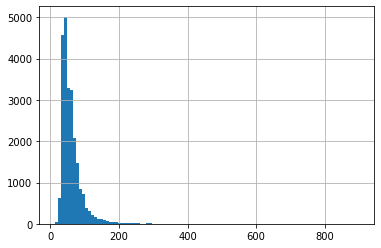

In [21]:
df['total_area'].hist(bins=100)
plt.show()

In [44]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

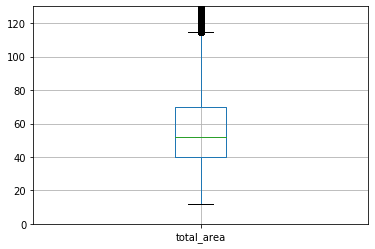

In [22]:
# Много выбросов. Возьмем лимит по YX(0, 130)
plt.ylim(0,130)
df.boxplot('total_area')
plt.show()

Вывод:
- Нижний ус начинается со значения 17 кв.метрах
- Верхний ус на 117 кв.метрах
- Сама коробка от 40 до 70 кв. метрах
- Ориентировочно, берем диапазон от 17 до 117 кв. метров

#### Цена

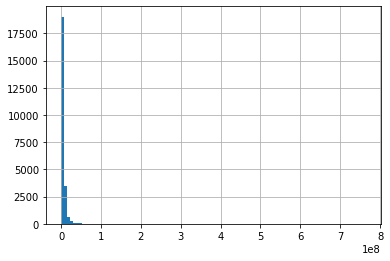

In [30]:
df['last_price'].hist(bins=100)
plt.show()

In [43]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

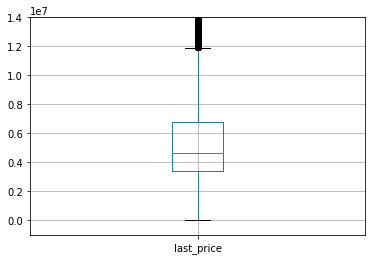

In [46]:
# Возьмем лимит по YX(-1e+06, 1.4e+07)
plt.ylim(-1e+06, 1.4e+07)
df.boxplot('last_price')
plt.show()

In [20]:
cheap_object = df[df['last_price'] == 1.219000e+04]
cheap_object

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,total_living_areas_ratio,kitchen_total_areas_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,последний,False,...,0.0,NaN,8,111.834862,2,3,2019,последний,0.293578,0.37156


109 кв.метров за 12190 рублей. Эта строка точно несет ошибочные данные.

In [53]:
# Удалим эту строку
df = df.drop(df[df['last_price'] == 12190].index)

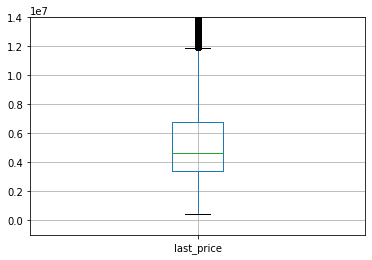

In [23]:
plt.ylim(-1e+06, 1.4e+07)
df.boxplot('last_price')
plt.show()

Вывод
- Минимальное значение 12 190 рублей (слишком дешево)
- Первый квартиль начинается от 3.4 миллиона рублей
- Второй квартиль заканчивается на 6.8
- Возьмем срез от 430 000 до 12 000 000

#### Число комнат

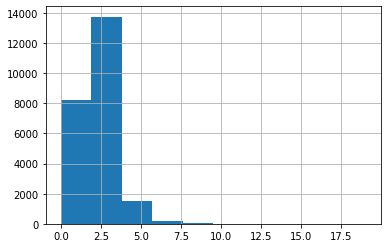

In [32]:
df['rooms'].hist(bins=10)
plt.show()

In [42]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

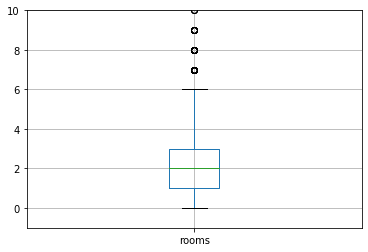

In [26]:
plt.ylim(-1, 10)
df.boxplot('rooms')
plt.show()

Вывод:
- Первый квартиль лежит от 1 комнаты
- Минимальное количество комнат 0
- Верхний ус указывает на 6 комнат
- Средний диапозон указывает на количество 3 комнат
- Берем срез от 1 до 6 комнат

#### Высота потолка

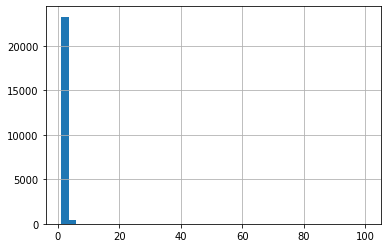

In [35]:
df['ceiling_height'].hist(bins=40)
plt.show()

In [41]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

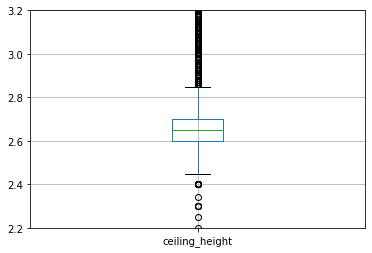

In [55]:
plt.ylim(2.2, 3.2)
df.boxplot('ceiling_height')
plt.show()

Вывод
- Первый квартиль лежит от 2.6 метров
- Нижний ус начинается от 2.4 метров
- Верхни ус упирается в 2.8 метров
- Возьмем срез от 2.4 до 2.9

#### Время продажи

In [38]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

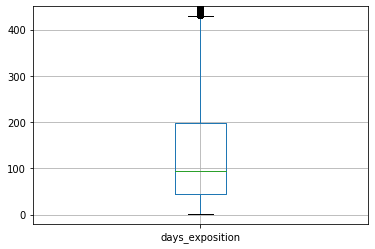

In [21]:
plt.ylim(-20, 450)
df.boxplot('days_exposition')
plt.show()

- Первый квартиль начинается с 45 дней.
- Второй квартиль с 95
- Минимальное значение с 1 дня
- Среднее значение до 200 дней
- Возьмем срез от 1 до 430 дней

Вывод
- в среднем объекты продаются от 45 до 200 дней
- Если объект купили до 45 дней - то это была быстрая продажа
- Если же объект не был куплен спустя 200 дней - то продажа затягивается

Берем срезы по нашим данным

In [54]:
total_area_query = 'total_area >= 17 and total_area <= 117'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'rooms >= 1 and rooms <= 6'
ceiling_height_query = 'ceiling_height >= 2.4 and ceiling_height <= 2.9'
days_exposition_query = 'days_exposition >= 1 and days_exposition <= 430'

### Изучим факторы, влияющие на ценообразование

Зависимость цены недвижимости от цены квадратного метра

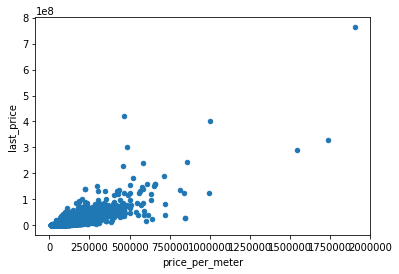

In [55]:
df.plot(x='price_per_meter', y='last_price', kind='scatter')
plt.show()

In [67]:
# Зависимость ценообразования от стоимости за кв.метр высока.
df['price_per_meter'].corr(df['last_price'])

0.7365149962844113

Зависимость цены недвижимости от числа комнат

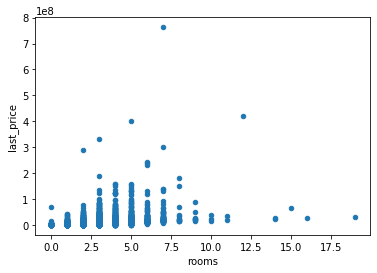

In [68]:
df.plot(x='rooms', y='last_price', kind='scatter')
plt.show()

In [69]:
# Зависимость ценообразования от количества комнат низкая.
df['rooms'].corr(df['last_price'])

0.36334398266009377

Зависимость цены недвижимости от отдаленности от городского центра

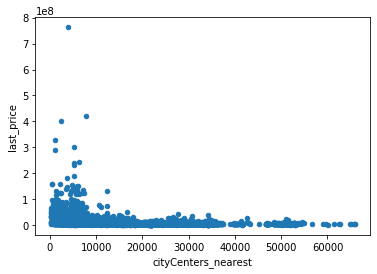

In [22]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [24]:
df['cityCenters_nearest'].corr(df['last_price'])
# Видим что зависимость дороговизны объекта от расположения к центру городу низкая. На самом деле и так видно, что большинство 
# продаваемых объектов находятся недалеко от центра.

-0.21227471425158967

Зависимость цены недвижимости от этажа объекта

In [24]:
df[['floor_category', 'last_price']].pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,6.675444e+06
первый,4.803560e+06
последний,7.361025e+06


Вывод
- Квартиры на первом этаже самые дешевые (возможно еще играет роль, что продаются дома в деревнях)
- На последнем этаже самы дорогие объекты

#### Зависимость стоимости от даты размещения объявления

In [56]:
df[['weekday_exposition','last_price']].pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

,last_price
weekday_exposition,
0,4650000.0
1,4730000.0
2,4700000.0
3,4650000.0
4,4585000.0
5,4555000.0
6,4550000.0


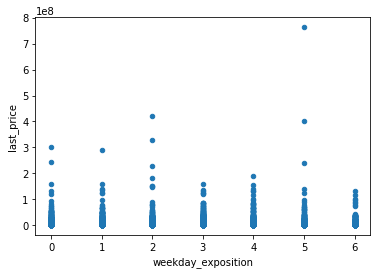

In [57]:
df.plot(x='weekday_exposition', y='last_price', kind='scatter')

In [58]:
df[['month_exposition','last_price']].pivot_table(index='month_exposition', values='last_price', aggfunc='median')

,last_price
month_exposition,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4515000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


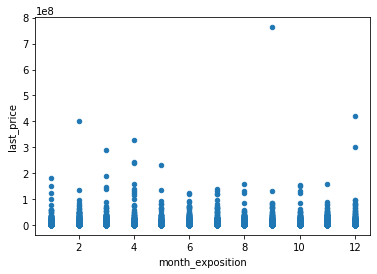

In [29]:
df.plot(x='month_exposition', y='last_price', kind='scatter')

In [40]:
df[['year_exposition','last_price']].pivot_table(index='year_exposition', values='last_price', aggfunc='median')

,last_price
year_exposition,
2014,7700000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


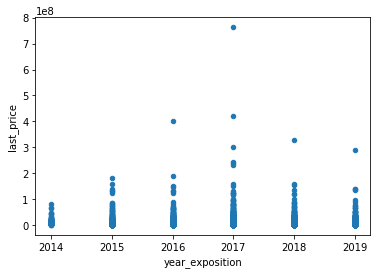

In [30]:
df.plot(x='year_exposition', y='last_price', kind='scatter')

Вывод
- Самые дорогие объекты были размещены в продажу в 2014 году

#### 10 населённых пунктов с наибольшим числом объявлений

In [59]:
top_10 = df['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      15720
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [60]:
top_10_names = list(top_10.index)

In [61]:
(
    df.query(f'locality_name in @top_10_names and {last_price_query}')
    .pivot_table(index='locality_name', values='price_per_meter')
    .sort_values(by='price_per_meter', ascending=False)
)

,price_per_meter
locality_name,
Санкт-Петербург,105628.948318
Пушкин,100322.823868
деревня Кудрово,92409.726322
поселок Парголово,90175.913458
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75185.478229
Гатчина,68421.902770
Всеволожск,67214.252635


Вывод
- Самая дорогая недвижимость продается в Санкт-Петербурге
- Самая дешевая в Выборге

#### Недвижимость в Санкт-Петербурге

In [62]:
spb_df = pd.DataFrame(df.loc[df['locality_name'] == "Санкт-Петербург"])
spb_df.reset_index()
len(spb_df)

15720

In [71]:
km = 1000
spb_df['nearest_city_center_km'] = (spb_df['cityCenters_nearest'] / km).astype('int')
spb_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,total_living_areas_ratio,kitchen_total_areas_ratio,nearest_city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214,13
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,95,110544.692737,3,4,2019,другой,NaN,0.263966,11


In [73]:
spb_prices = spb_df.query(last_price_query)
spb_df.pivot_table(index='nearest_city_center_km', values='last_price').sort_values(by='nearest_city_center_km', ascending='False')

,last_price
nearest_city_center_km,
0,2.344232e+07
1,1.885085e+07
2,1.616331e+07
3,1.343683e+07
4,1.363202e+07
5,1.530612e+07
6,1.438911e+07
7,1.279767e+07
8,8.445272e+06


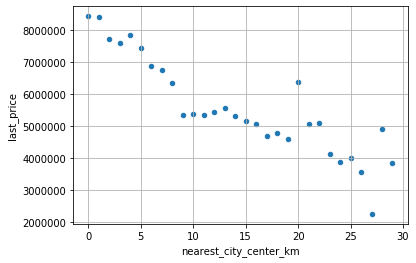

In [66]:
(pd.DataFrame(spb_prices.pivot_table(index='nearest_city_center_km', values='last_price').to_records())
    .plot(x='nearest_city_center_km', y='last_price', kind='scatter', grid=True))

Определив границу, где график сильно меняется — это и будет центральная зона. От 8 км.

In [74]:
# Объекты продажи в центре
objects_in_center = pd.DataFrame(spb_prices.query('nearest_city_center_km <= 7'))
len(objects_in_center)

2503

#### Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [78]:
# Средняя площадь 67 кв.метров
objects_in_center['total_area'].describe()

count    2503.000000
mean       67.405533
std        24.938981
min        12.000000
25%        48.000000
50%        64.500000
75%        82.000000
max       206.000000
Name: total_area, dtype: float64

In [76]:
# Средняя цена 7 500 000 рублей
objects_in_center['last_price'].describe()

count    2.503000e+03
mean     7.502496e+06
std      2.262249e+06
min      1.600000e+06
25%      5.800000e+06
50%      7.400000e+06
75%      9.150000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [77]:
# Среднее число комнат продаваемых квартир - 2
objects_in_center['rooms'].describe()

count    2503.000000
mean        2.363164
std         1.056154
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

In [79]:
# Средняя высота потолков 2.9 метров
objects_in_center['ceiling_height'].describe()

count    2503.000000
mean        2.903580
std         0.823564
min         2.400000
25%         2.650000
50%         2.730000
75%         3.050000
max        32.000000
Name: ceiling_height, dtype: float64

### Выделим факторы, влияющие на стоимость квартиры

In [103]:
factors = [
    'last_price',
    'nearest_city_center_km',
    'total_area',
    'rooms',
    'ceiling_height',
    'weekday_exposition',
    'month_exposition',
    'year_exposition'
]
objects_in_center[factors].corr().sort_values('last_price', ascending=False)

,last_price,nearest_city_center_km,total_area,rooms,ceiling_height,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,-0.181685,0.696923,0.493181,0.098278,0.015883,-0.028051,-0.014305
total_area,0.696923,-0.226291,1.000000,0.807907,0.104914,-0.009844,-0.007348,-0.126474
rooms,0.493181,-0.204685,0.807907,1.000000,0.060666,-0.024753,-0.008981,-0.085891
ceiling_height,0.098278,-0.121388,0.104914,0.060666,1.000000,-0.013978,-0.012882,0.046091
weekday_exposition,0.015883,0.013926,-0.009844,-0.024753,-0.013978,1.000000,0.034769,0.000845
year_exposition,-0.014305,0.051125,-0.126474,-0.085891,0.046091,0.000845,-0.228564,1.000000
month_exposition,-0.028051,-0.003839,-0.007348,-0.008981,-0.012882,0.034769,1.000000,-0.228564
nearest_city_center_km,-0.181685,1.000000,-0.226291,-0.204685,-0.121388,0.013926,-0.003839,0.051125


In [89]:
objects_in_center.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price')

,last_price
floor_category,
первый,6.394661e+06
последний,7.597198e+06
другой,7.701505e+06


### Шаг 5. Общий вывод

- Самые дорогие объекты продаются в Питере 
- Чем ближе к центру - тем дороже
- Самая дешевая недвижимость находится в Выборге
- Чаще всего продаются 2-комнатные квартиры
- Квартиры на последнем этаже дороже
- Квартиры же на первом этаже продаются дешевле остальных, но возможно это связано с тем что также на первых этажах продаются дома в деревнях

Факторы, влияющие на стоимость:
- общая площадь
- кол-во комнат
- расстояние от центра